<a href="https://colab.research.google.com/github/rithz623/Research1/blob/main/Anova_APR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')





Mounted at /content/drive


In [ ]:
# Load all datasets
control = [
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/Py1.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/jan10_aud.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/jan13 audposter:void.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/jan28_nonposter.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/poster_jan31.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/nonposter-1:14.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/placebo_jan24_reading.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/poster_void_feb3.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/poster/feb5_poster.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/void2jan17.csv"]

# List to store filtered data for final combined plot
filtered_control_dfs = []

# Generate 10 separate plots (one per day)
for i, file in enumerate(control):
    # Read file
    df = pd.read_csv(file)
    df = df.drop(columns=['S.N'])  # Drop S.N column
    df.columns = ['Time (30 sec)', 'Decibel Reading']

    # Select middle 60 rows
    middle_index = len(df) // 2
    df = df.iloc[middle_index - 30: middle_index + 30]

    # Adjust time (keeping 30 sec intervals)
    df['Time (30 sec)'] = np.arange(0, len(df) * 30, 30)

    # Store filtered data
    filtered_control_dfs.append(df)

In [ ]:
poster = [
    "/content/drive/MyDrive/AP RESEARCH DATA/poster/decibel_readings_jan22post.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/poster/decibel_readings_poster4:5(1).csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/poster/feb3_poster.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/poster/feb5_poster.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/poster/jan30_poster.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/poster/poster_Jan24_reading.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/poster/poster_feb5.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/poster/poster_jan 23-reading.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/poster/poster_jan27_reading.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/poster/poster_jan31.csv"
]


# List to store filtered data for final combined plot
filtered_poster_dfs = []

# Generate 10 separate plots (one per day)
for i, file in enumerate(poster): # Changed file_paths to poster
    # Read file
    df = pd.read_csv(file)
    df = df.drop(columns=['S.N'])  # Drop S.N column
    df.columns = ['Time (30 sec)', 'Decibel Reading']

    # Select middle 60 rows
    middle_index = len(df) // 2
    df = df.iloc[middle_index - 30: middle_index + 30]

    # Adjust time (keeping 30 sec intervals)
    df['Time (30 sec)'] = np.arange(0, len(df) * 30, 30)

    # Store filtered data
    filtered_poster_dfs.append(df)

In [ ]:
# Combine the filtered dataframes and add group and day columns

combined_df = pd.DataFrame()

# Add data for the 'control' group (labeled as 0)
for i, df in enumerate(filtered_control_dfs):
    df['Group'] = 0  # 0 for control
    df['Day'] = f'Day {i + 1}' # Label days from Day 1 to Day 10
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Add data for the 'poster' group (labeled as 1)
for i, df in enumerate(filtered_poster_dfs):
    df['Group'] = 1  # 1 for poster
    df['Day'] = f'Day {i + 1}'  # Label days from Day 1 to Day 10
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Display the first few rows of the combined dataframe
display(combined_df.head())

# Display the last few rows of the combined dataframe to check the poster data
display(combined_df.tail())

,Time (30 sec),Decibel Reading,Group,Day
0,0,50.220793,0,Day 1
1,30,55.267421,0,Day 1
2,60,55.225838,0,Day 1
3,90,57.802435,0,Day 1
4,120,54.732449,0,Day 1


,Time (30 sec),Decibel Reading,Group,Day
1195,1650,54.695234,1,Day 10
1196,1680,58.958029,1,Day 10
1197,1710,50.377417,1,Day 10
1198,1740,52.742493,1,Day 10
1199,1770,57.302088,1,Day 10


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
# The formula specifies the dependent variable 'Decibel Reading' and the independent variables 'Group' and 'Day'
# C() is used to treat 'Group' and 'Day' as categorical variables
model = ols('Q("Decibel Reading") ~ C(Group) * C(Day)', data=combined_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
display(anova_table)

,sum_sq,df,F,PR(>F)
C(Group),2304.391038,1.0,75.478850,1.212470e-17
C(Day),8602.589543,9.0,31.308034,1.896086e-49
C(Group):C(Day),14970.602521,9.0,54.483609,5.430873e-83
Residual,36025.739816,1180.0,NaN,NaN


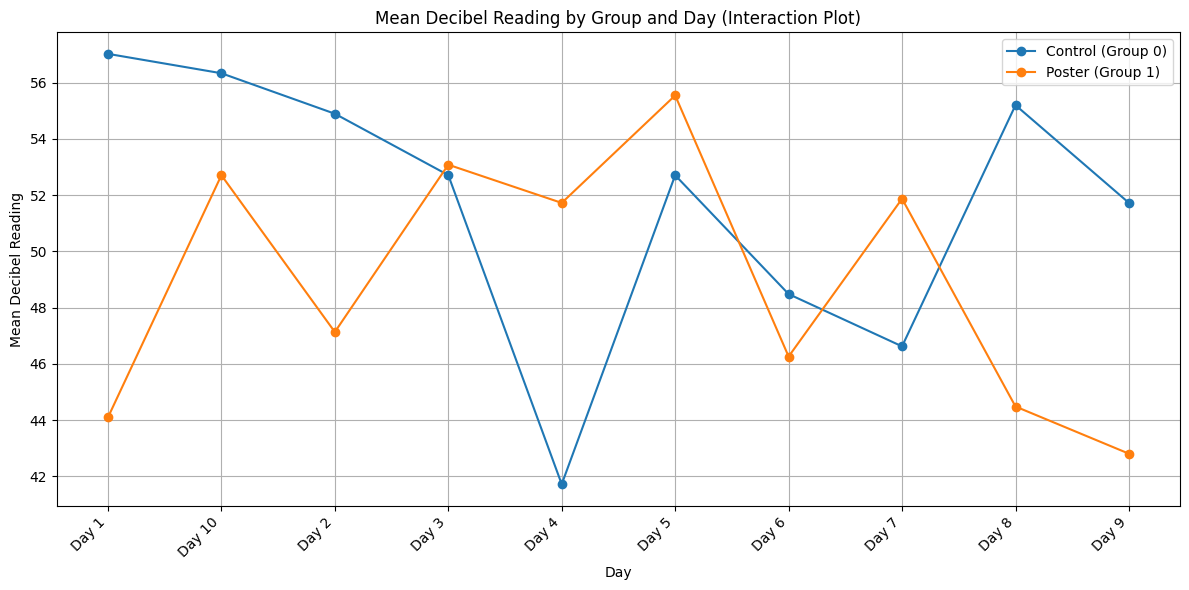

In [ ]:
# Calculate mean decibel reading for each group and day
mean_decibel_by_group_day = combined_df.groupby(['Group', 'Day'])['Decibel Reading'].mean().reset_index()

# Separate data for plotting
mean_control = mean_decibel_by_group_day[mean_decibel_by_group_day['Group'] == 0].copy()
mean_poster = mean_decibel_by_group_day[mean_decibel_by_group_day['Group'] == 1].copy()

# Sort by day to ensure correct plotting order
day_order = [f'Day {i+1}' for i in range(10)]
mean_control.loc[:, 'Day'] = pd.Categorical(mean_control['Day'], categories=day_order, ordered=True)
mean_poster.loc[:, 'Day'] = pd.Categorical(mean_poster['Day'], categories=day_order, ordered=True)
mean_control = mean_control.sort_values('Day')
mean_poster = mean_poster.sort_values('Day')


# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(mean_control['Day'], mean_control['Decibel Reading'], marker='o', label='Control (Group 0)')
plt.plot(mean_poster['Day'], mean_poster['Decibel Reading'], marker='o', label='Poster (Group 1)')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Mean Decibel Reading')
plt.title('Mean Decibel Reading by Group and Day (Interaction Plot)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Now, let's prepare the data for training a classification model. We will use the `Decibel Reading` as the feature to predict the `Group` (control or poster).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare data for classification
X = combined_df[['Decibel Reading']] # Feature
y = combined_df['Group'] # Target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model: {accuracy:.4f}")

Accuracy of the model: 0.5833


The accuracy score indicates how well the model can predict the group based on the decibel reading. A higher accuracy suggests a better ability to distinguish between the control and poster groups.